In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ["GCR_CONFIG_SOURCE"] = "files"
from astropy.cosmology import FlatLambdaCDM
import GCR
import GCRCatalogs as GCRCat
import numpy as np
import sys

ROOT_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(ROOT_DIR)
import pandas as pd
from matplotlib.lines import Line2D
import itertools
from itertools import permutations
from itertools import product
import utils.utils as ut
import healpy as hp
import astropy
import astropy.units as u
import astropy.cosmology.units as cu
from importlib import reload

dataColumns = np.array(
    [
        "redshift_true",
        "ra_true",
        "dec_true",
        "Mag_true_u_lsst_z0_no_host_extinction",  # Rest frame mags
        "Mag_true_g_lsst_z0_no_host_extinction",
        "Mag_true_r_lsst_z0_no_host_extinction",
        "Mag_true_i_lsst_z0_no_host_extinction",
        "Mag_true_z_lsst_z0_no_host_extinction",
        "Mag_true_Y_lsst_z0_no_host_extinction",
        "mag_true_u_lsst_no_host_extinction",  # Observed mags
        "mag_true_g_lsst_no_host_extinction",
        "mag_true_r_lsst_no_host_extinction",
        "mag_true_i_lsst_no_host_extinction",
        "mag_true_z_lsst_no_host_extinction",
        "mag_true_Y_lsst_no_host_extinction",
        "galaxyID",
        "is_central",
    ]
)

NSIDE = 128

cat_name = "skysim5000_v1.2_small"
skysimCat = GCRCat.load_catalog(cat_name)

/global/u1/s/seanmacb/DESC/DESC-GW/gwStreetlights/utils/utils.py:852: SyntaxWarning: invalid escape sequence '\p'
  a.set_ylabel("$\phi [h^3 Mpc^{-3]}]$")


# Proof of concept of the reduction pipeline

## Five cases
- Fiducial
- Fiducial + $H_0=50 \texttt{ km s}^{-1} \texttt{ Mpc}^-1$
- Fiducial + LSST Y7
- Fiducial + modeled redshift
- Fiducial + 0.3 mag uniformity

## Plots to make
- Galaxy luminosity function per band, per z-bin
- $P(z)$ distribution
- Redshift precision relative to expectation
- Magnitude non-uniformity plot across healpixel compared to expectation

### Plots

In [8]:
reload(ut)

/global/u1/s/seanmacb/DESC/DESC-GW/gwStreetlights/utils/utils.py:847: SyntaxWarning: invalid escape sequence '\p'
  # Formatting each plot


<module 'utils.utils' from '/global/u1/s/seanmacb/DESC/DESC-GW/gwStreetlights/utils/utils.py'>

## Fiducial
- $H_0=71$
- LSST Y1
- Photo-z, unmodeled
- 0.1 mag

In [3]:
year = 1  # LSST Year 1
modeled = False  # Unmodeled photo-z
uniformity = 0.1  # Mag
airmass = 1.2  # DES average
mags_deeper = 1  # Going one mag deeper than the original projection
z_max = 1.4  # This is where photo-z's break down without IR data
spectroscopic = False  # Use

In [4]:
%%time
data, limiting_mags, hp_band_dict = ut.apply_lsst_depth_and_uniformity(
    skysimCat,
    year,
    dataColumns,
    airmass,
    z_max,
    NSIDE,
    z_min=0,
    mags_deeper=10 * uniformity,
    uniformity=uniformity,
    modeled=modeled,
    spectroscopic=spectroscopic,
)

/opt/desc/py/lib/python3.12/site-packages/astropy/modeling/powerlaws.py:633: RuntimeWarning: divide by zero encountered in power
  return 0.4 * np.log(10) * phi_star * factor ** (alpha + 1) * np.exp(-factor)
/opt/desc/py/lib/python3.12/site-packages/astropy/modeling/powerlaws.py:633: RuntimeWarning: overflow encountered in power
  return 0.4 * np.log(10) * phi_star * factor ** (alpha + 1) * np.exp(-factor)
/global/u1/s/seanmacb/DESC/DESC-GW/gwStreetlights/utils/utils.py:793: OptimizeWarning: Covariance of the parameters could not be estimated
  (M_centers <= mag_low_fit)


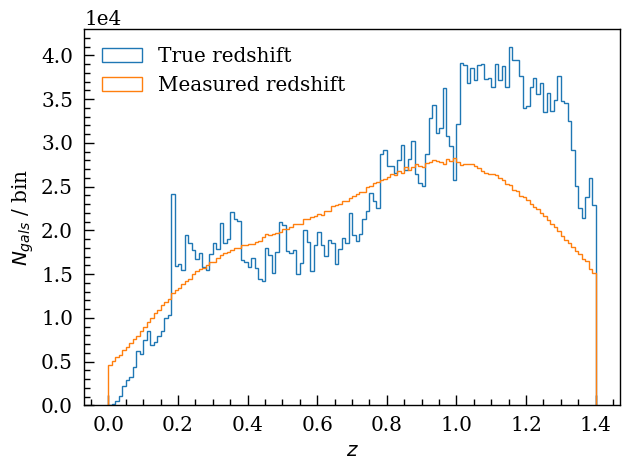

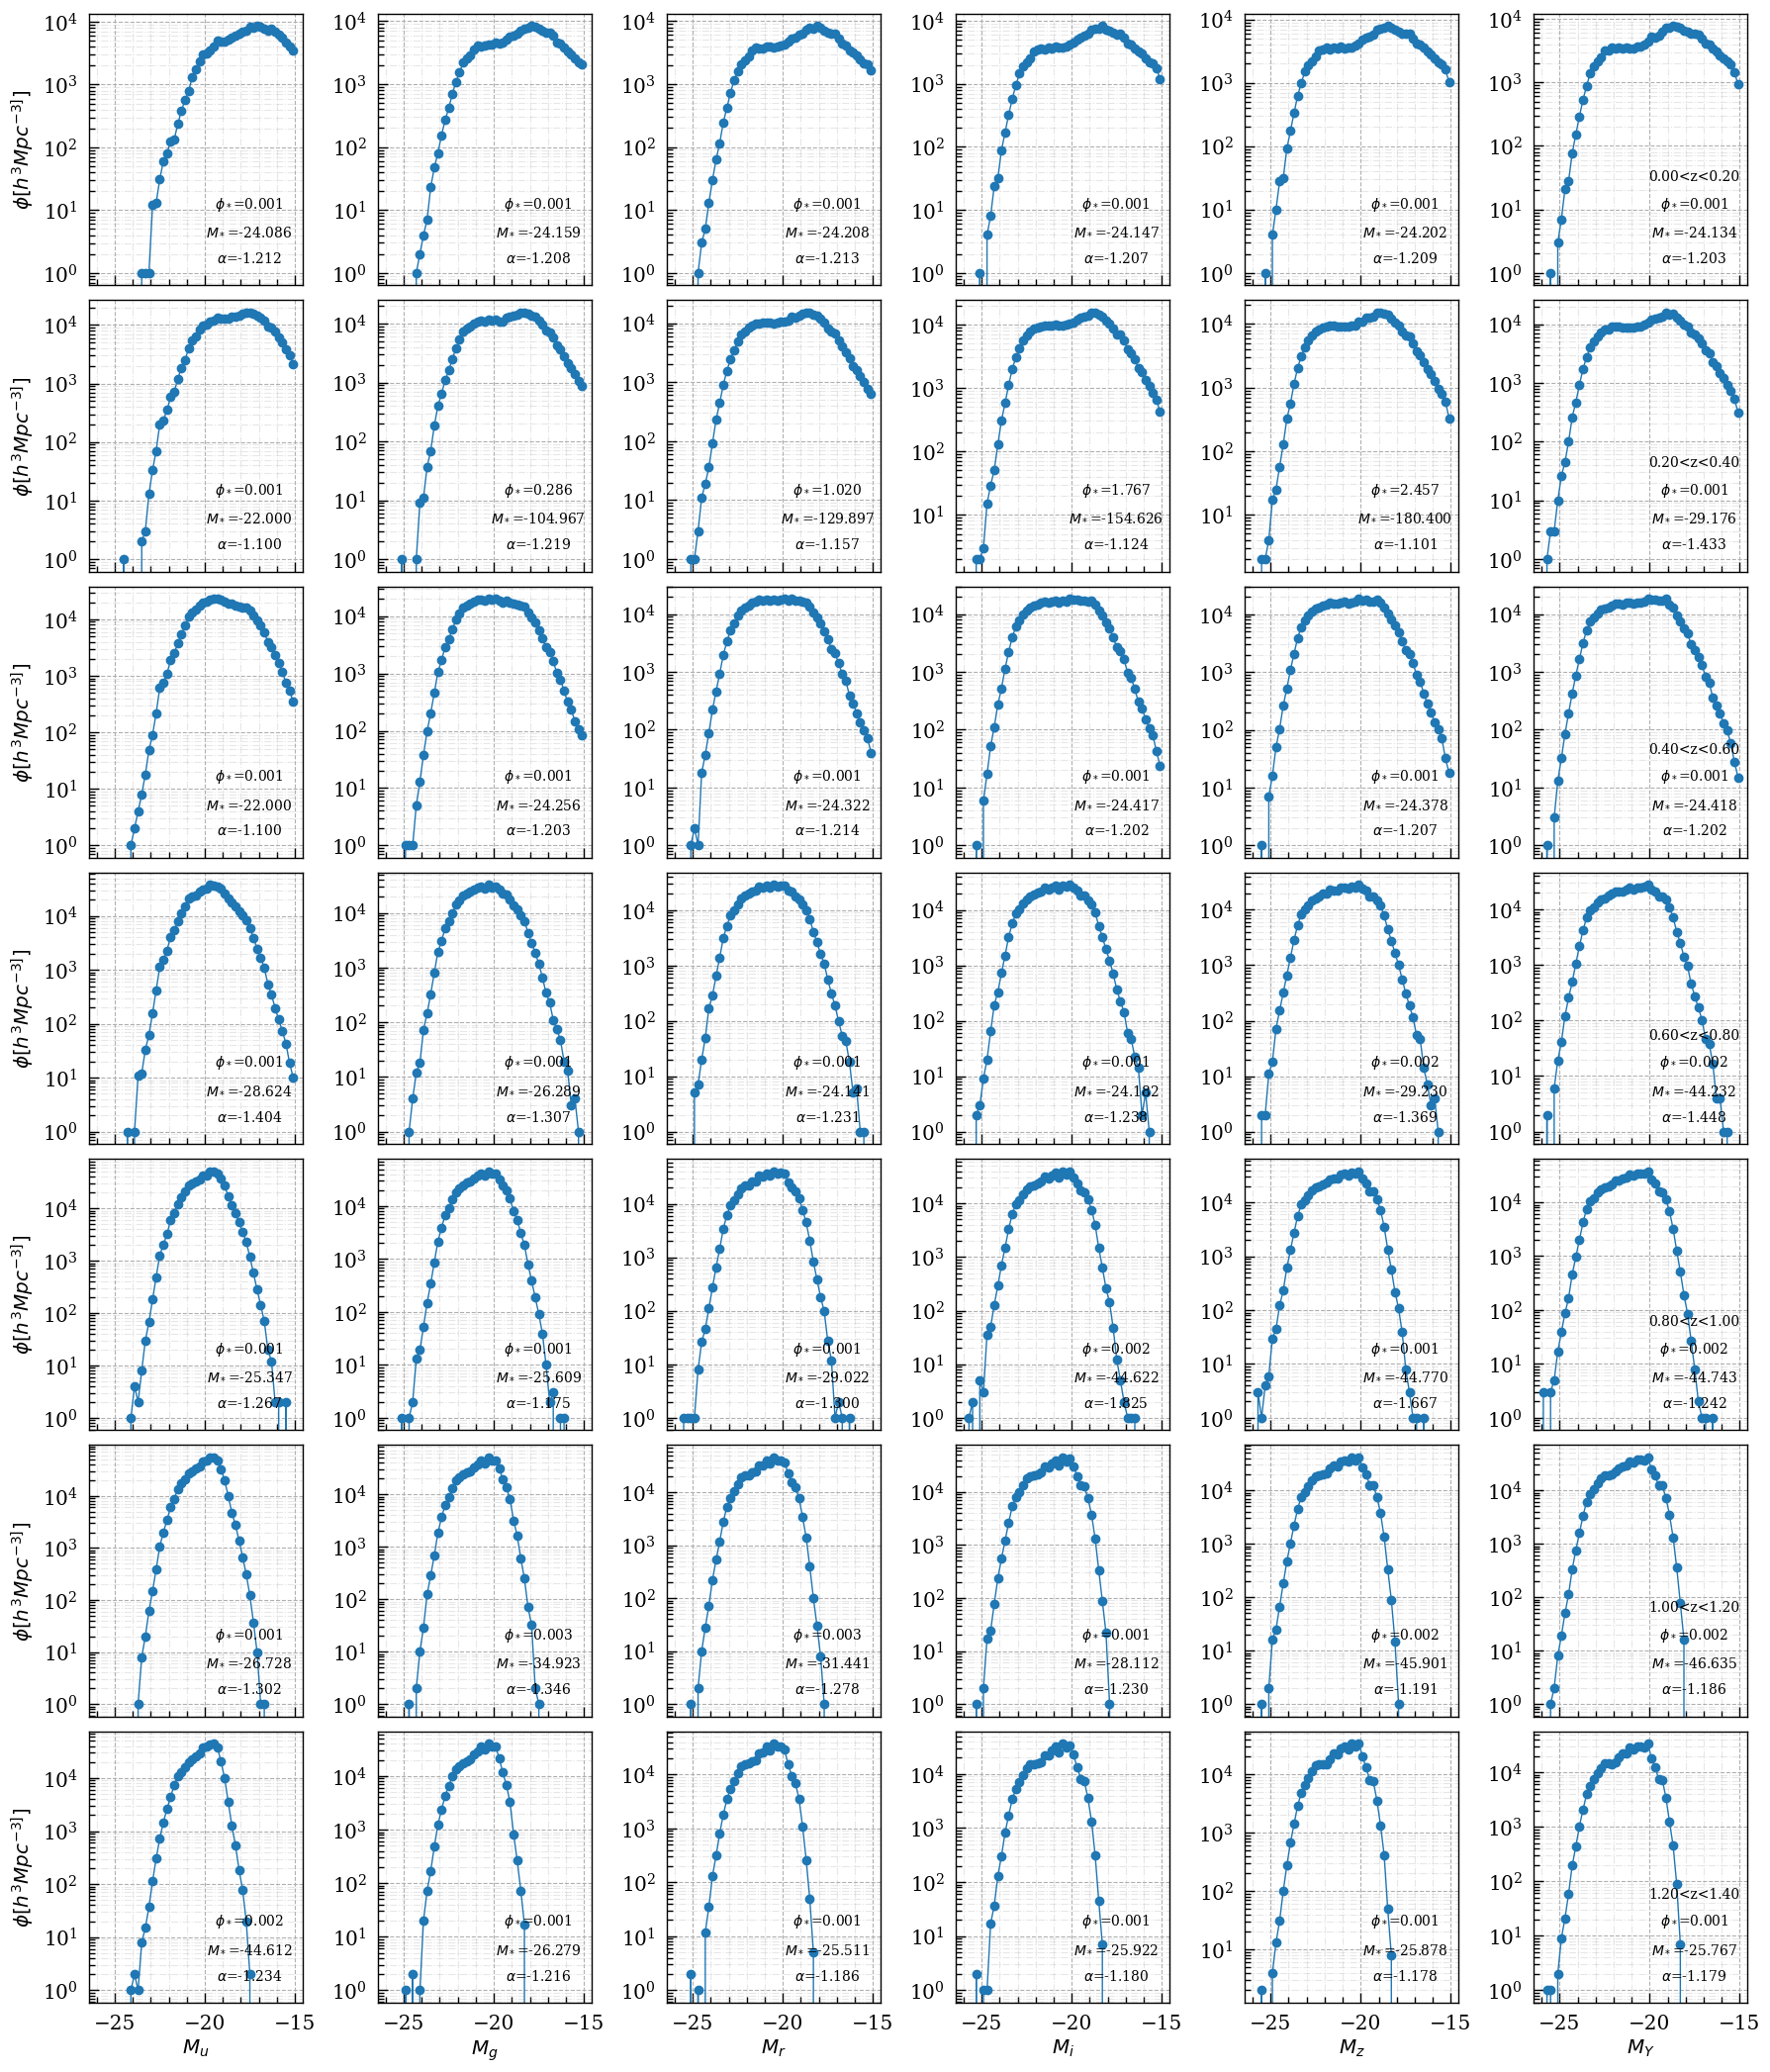

Dataframe passes magnitude limit criteria
CPU times: user 16.1 s, sys: 316 ms, total: 16.4 s
Wall time: 16.5 s


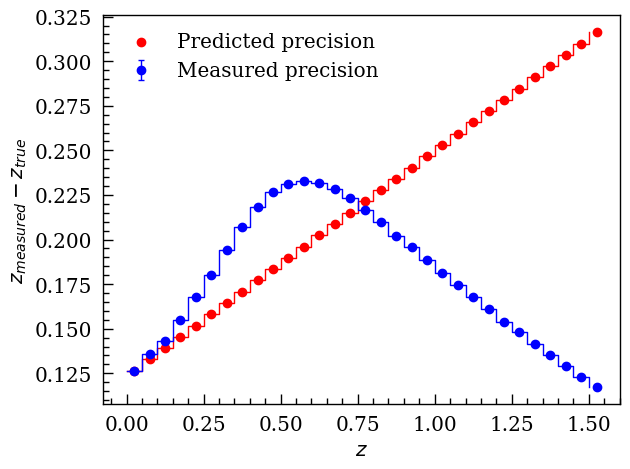

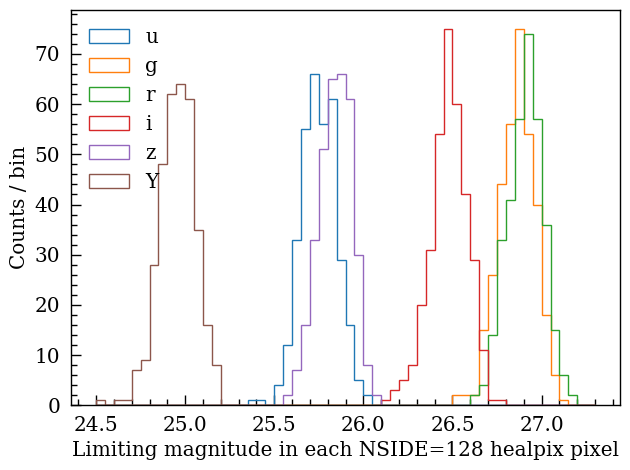

In [9]:
%%time
results, mag_lim_check_result, figs, axes = ut.run_survey_diagnostics(
    data,
    hp_band_dict,
    skysimCat,
    year,
    z_max,
    z_step_pz=0.01,
    z_step_lf=0.2,
    brightMag=-26,
    faintMag=-15,
    mag_low_fit=-17,
    mag_high_fit=-24,
    p0=(1e-3, -22.0, -1.1),
    maxfev=50000,
    modeled=modeled,
    hi_mag=27.3,
    low_mag=24.5,
    NSIDE=NSIDE,
)

## Fiducial + LSST Y7

## Fiducial + modeled redshift

## Fiducial + $H_0=50 \text{ km s}^{-1} \text{ Mpc}^{-1}$

## Fiducial + 0.3 mag uniformity